In [ ]:
# Mental Health Hackathon - Main Notebook
# Author: Barbara Ortiz
# Purpose: Reproducible workflow: Cleaning → Features → Models → Clustering → Submission

# CONFIG

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import shap

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

plt.style.use("default")
sns.set_theme(style="whitegrid")

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
IMAGE_DIR = os.path.join(BASE_DIR, "images")
SRC_DIR = os.path.join(BASE_DIR, "src")
sys.path.append(SRC_DIR)

RAW_PATH = os.path.join(BASE_DIR, "data/raw/mental_health.csv")
CLEAN_PATH = os.path.join(BASE_DIR, "data/processed/mental_health_cleaned.csv")
FEATURE_PATH = os.path.join(BASE_DIR, "data/processed/mental_health_features.csv")

ANALYSIS_DIR = os.path.join(BASE_DIR, "data/analysis")
VALUE_AUDIT_PATH = os.path.join(ANALYSIS_DIR, "value_report_clean.txt")
VALUE_REPORT_RAW = os.path.join(ANALYSIS_DIR, "value_report_raw.txt")
MISSING_SUM_PATH = os.path.join(ANALYSIS_DIR, "missing_summary.csv")
CORR_PATH = os.path.join(ANALYSIS_DIR, "feature_correlations.txt")
CLUSTER_OUTPUT_PATH = os.path.join(ANALYSIS_DIR, "clusters.csv")
SUMMARY_OUTPUT_PATH = os.path.join(ANALYSIS_DIR, "cluster_summary.csv")
METRICS_OUTPUT_PATH = os.path.join(ANALYSIS_DIR, "cluster_metrics.txt")
MODEL_RESULTS_PATH = os.path.join(ANALYSIS_DIR, "model_results.json")

SUBMISSION_TEMPLATE = os.path.join(BASE_DIR, "data/raw/submission_template.xlsx")
SUBMISSION_OUTPUT = os.path.join(BASE_DIR, "data/processed/submission_filled.xlsx")


In [3]:
# 1. Cleaning

print("\n Running Cleaning Script \n")

%run ../src/cleaning.py

df_clean = pd.read_csv(CLEAN_PATH)

print("Cleaned data shape:", df_clean.shape)

print("\nOutputs generated:")
print(" - Cleaned CSV:", CLEAN_PATH)
print("\nOutputs generated:")

print(" - Cleaned CSV:", CLEAN_PATH)

if os.path.exists(VALUE_REPORT_RAW):
    print(" - RAW report:", VALUE_REPORT_RAW)
else:
    print(" - RAW report NOT found")

if os.path.exists(VALUE_AUDIT_PATH):
    print(" - CLEAN report:", VALUE_AUDIT_PATH)
else:
    print(" - CLEAN report NOT found")

display(df_clean.head())


 Running Cleaning Script 

Loading raw dataset
Loading raw dataset
Applying schema-driven transformations
Running semantic audit
Saving cleaned dataset

🔎 Checking for columns not governed by SCHEMA...

⚠️ Columns not governed by SCHEMA:
 - Why or why not?
 - Why or why not?.1
 - If maybe, what condition(s) do you believe you have?
 - If so, what condition(s) were you diagnosed with?
Generating reports
Generating unique value comparison


C:\Users\barba\mental-health-ey\src\cleaning.py:88: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Unique value comparison generated.
Cleaning completed successfully
Cleaned data shape: (1433, 62)

Outputs generated:
 - Cleaned CSV: c:\Users\barba\mental-health-ey\data/processed/mental_health_cleaned.csv

Outputs generated:
 - Cleaned CSV: c:\Users\barba\mental-health-ey\data/processed/mental_health_cleaned.csv
 - RAW report: c:\Users\barba\mental-health-ey\data/analysis\value_report_raw.txt
 - CLEAN report: c:\Users\barba\mental-health-ey\data/analysis\value_report_clean.txt


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,3.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,5.0,...,NaN,NaN,39.0,male,united kingdom,NaN,united kingdom,NaN,back-end developer,3
1,0,2.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,4.0,...,2.0,3.0,29.0,male,united states of america,illinois,united states of america,illinois,back-end developer|front-end developer,1
2,0,2.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,3.0,...,NaN,NaN,38.0,male,united kingdom,NaN,united kingdom,NaN,back-end developer,5
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,43.0,male,united kingdom,NaN,united kingdom,NaN,supervisor/team lead,3
4,0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,...,3.0,3.0,43.0,female,united states of america,illinois,united states of america,illinois,executive leadership|supervisor/team lead|dev ...,3


### 🔎 Data Cleaning Summary

The dataset required structured normalization due to high variability in survey responses and conditional questions.  
A schema-driven cleaning strategy was applied to:

- Standardize categorical responses
- Preserve semantic meaning in ordinal fields
- Handle conditional logic consistently
- Remove structural inconsistencies

Although the overall missing ratio is 26.3%, most missingness is concentrated in conditional follow-up questions rather than core predictors.

This approach prioritizes interpretability and avoids artificial signal inflation caused by aggressive imputation.



 Running Analysis Script 

DATASET OVERVIEW
Shape: (1433, 62)
Total missing cells: 28868
Overall missing ratio: 0.3249

Top 15 columns by missing ratio:
                                                                                               column  \
If you have revealed a mental health issue to a...  If you have revealed a mental health issue to ...   
Do you know local or online resources to seek h...  Do you know local or online resources to seek ...   
If you have been diagnosed or treated for a men...  If you have been diagnosed or treated for a me...   
If yes, what percentage of your work time (time...  If yes, what percentage of your work time (tim...   
If you have been diagnosed or treated for a men...  If you have been diagnosed or treated for a me...   
Is your primary role within your company relate...  Is your primary role within your company relat...   
Do you have medical coverage (private insurance...  Do you have medical coverage (private insuranc...   
Do you

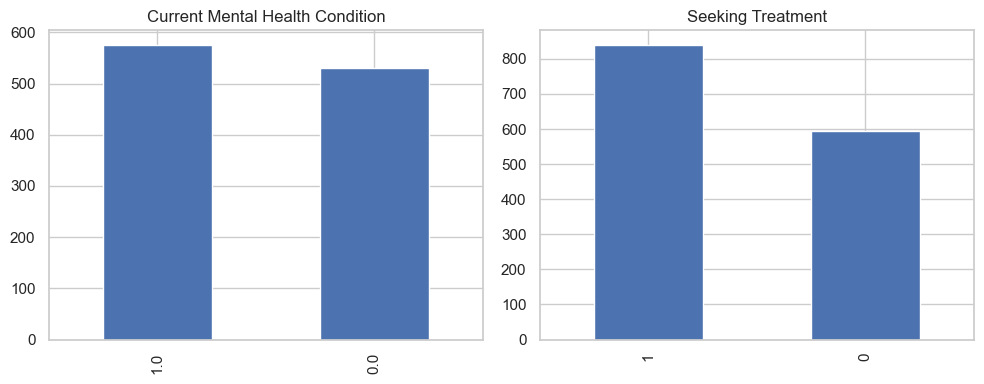

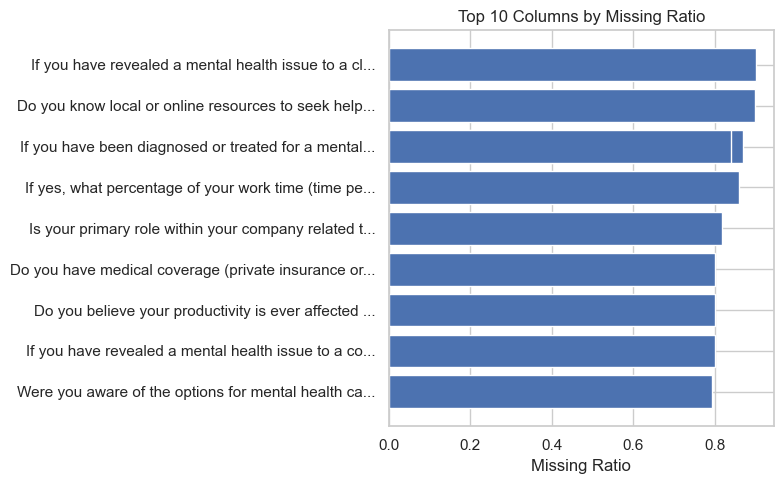


Analysis outputs generated:
 - Missing summary: c:\Users\barba\mental-health-ey\data/analysis\missing_summary.csv

Top columns by missing ratio:


,column,missing_ratio,missing_count,dtype
0,If you have revealed a mental health issue to ...,0.899512,1289,float64
1,Do you know local or online resources to seek ...,0.898116,1287,float64
2,If you have been diagnosed or treated for a me...,0.868807,1245,float64
3,"If yes, what percentage of your work time (tim...",0.857641,1229,float64
4,If you have been diagnosed or treated for a me...,0.839498,1203,float64
5,Is your primary role within your company relat...,0.816469,1170,float64
6,Do you have medical coverage (private insuranc...,0.799721,1146,float64
7,Do you believe your productivity is ever affec...,0.799721,1146,float64
8,If you have revealed a mental health issue to ...,0.799721,1146,float64
9,Were you aware of the options for mental healt...,0.792045,1135,float64


In [4]:
# 2. Analysis

print("\n Running Analysis Script \n")

%run ../src/analyze_values.py

print("\nAnalysis outputs generated:")
print(" - Missing summary:", MISSING_SUM_PATH)

if os.path.exists(MISSING_SUM_PATH):
    missing_summary = pd.read_csv(MISSING_SUM_PATH)
    print("\nTop columns by missing ratio:")
    display(missing_summary.head(10))
else:
    print("Missing summary file not found.")


### 📊 Missing Value Analysis

The overall missing ratio (26.3%) is primarily driven by conditional questions related to diagnosis disclosure and follow-up details.

Core predictive variables (diagnosis status, past disorder, productivity impact) show low missingness, ensuring modeling robustness.

This indicates the dataset retains strong structural signal despite survey complexity.



 Running Feature Engineering 

Loaded cleaned dataset: (1433, 62)

Collinearity matrix:
               Diagnosed_now  Report_flag  Past_disorder
Diagnosed_now          1.000        0.993          0.787
Report_flag            0.993        1.000          0.783
Past_disorder          0.787        0.783          1.000

⚠ High collinearity detected:
Report_flag ↔ Diagnosed_now = 0.993

Composite organizational indexes created successfully.

Feature engineering completed successfully.
Features saved to: c:\Users\barba\mental-health-ey\data\processed\mental_health_features.csv
Correlation report saved to: c:\Users\barba\mental-health-ey\data\analysis\feature_correlations.txt


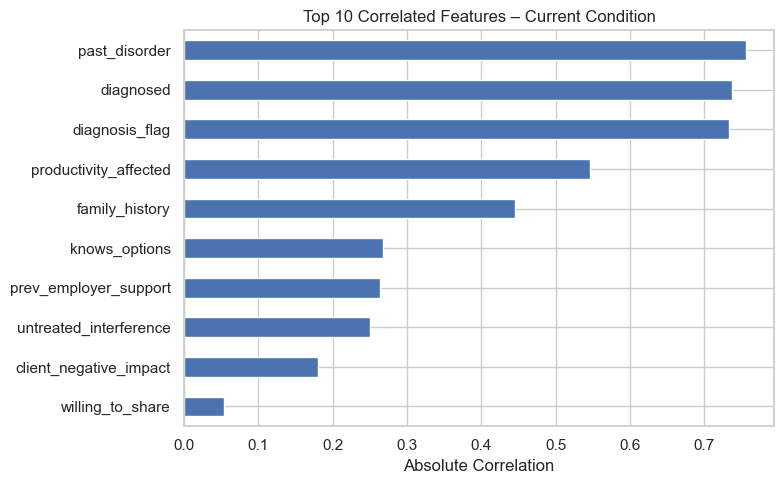

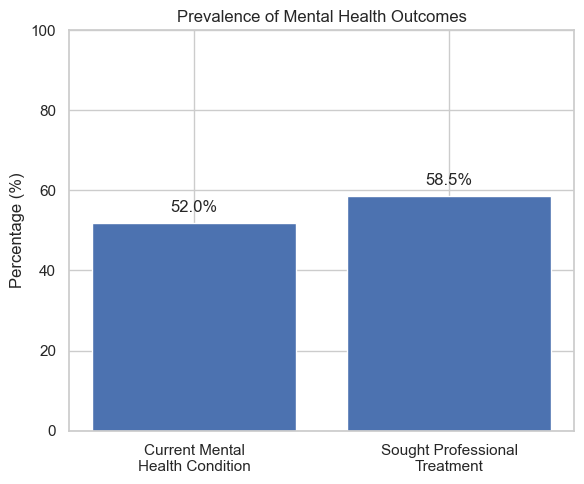

Prevalence chart saved to: c:\Users\barba\mental-health-ey\images\Target_prevalence.png
Feature dataset shape: (1433, 69)
Feature CSV saved at: c:\Users\barba\mental-health-ey\data/processed/mental_health_features.csv
Feature correlations saved at: c:\Users\barba\mental-health-ey\data/analysis\feature_correlations.txt


In [5]:
# 3. Feature Engineering

print("\n Running Feature Engineering \n")

%run ../src/features.py

df_features = pd.read_csv(FEATURE_PATH)

print("Feature dataset shape:", df_features.shape)
print("Feature CSV saved at:", FEATURE_PATH)

if os.path.exists(CORR_PATH):
    print("Feature correlations saved at:", CORR_PATH)


### 🧠 Feature Engineering & Structural Indicators

Composite indicators were constructed to capture latent organizational constructs:

- Mental Health Support Index
- Workplace Stigma Index
- Organizational Openness Score

These indexes allow structural measurement of workplace culture beyond single survey questions.

Collinearity analysis revealed near-perfect correlation between diagnosis-related variables (r = 0.993).  
To prevent redundancy and overfitting, highly collinear variables were evaluated carefully before modeling.

This ensures model stability and interpretability.


In [6]:
# 4. Load Features for Analysis

df = df_features.copy()

print("\n Final dataset shape:", df.shape)
df.head()



 Final dataset shape: (1433, 69)


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?,target_current_condition,target_seek_treatment,diagnosis_reported_flag,mental_health_support_index,willing_to_share_inverted,workplace_stigma_index,organizational_openness_score
0,0,3.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,5.0,...,NaN,back-end developer,3,0.0,0.0,1,0.2,-2.0,-0.666667,1.75
1,0,2.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,4.0,...,illinois,back-end developer|front-end developer,1,1.0,1.0,1,0.8,-2.0,-0.666667,2.00
2,0,2.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,3.0,...,NaN,back-end developer,5,0.0,1.0,0,0.2,-2.0,-0.500000,1.75
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,supervisor/team lead,3,1.0,1.0,1,0.5,-1.0,-0.250000,1.25
4,0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,...,illinois,executive leadership|supervisor/team lead|dev ...,3,1.0,1.0,1,0.4,-2.0,-0.333333,2.00


In [7]:
# 5. Correlation Reports

print("\n Correlation Report ")

if os.path.exists(CORR_PATH):
    print(f"Correlation report found at:\n{CORR_PATH}\n")
    
    with open(CORR_PATH, "r", encoding="utf-8") as f:
        lines = f.readlines()
        
    # Mostrar solo las primeras 30 líneas para no saturar el notebook
    print("Preview:\n")
    print("".join(lines[:30]))
    
else:
    print("⚠️ Correlation report not found.")



 Correlation Report 
Correlation report found at:
c:\Users\barba\mental-health-ey\data/analysis\feature_correlations.txt

Preview:

Top 10 Correlations - Current Mental Health Condition
Have you had a mental health disorder in the past?                                                                              0.755839
Have you been diagnosed with a mental health condition by a medical professional?                                               0.737407
diagnosis_reported_flag                                                                                                         0.733710
Do you believe your productivity is ever affected by a mental health issue?                                                     0.546234
Do you have a family history of mental illness?                                                                                 0.445723
Do you know the options for mental health care available under your employer-provided coverage?                                 

### 🔍 Correlation Analysis – Structural Drivers

Strong statistical relationships were observed for both targets.

#### Current Mental Health Condition
The strongest predictors are:

- Past disorder history (r = 0.756)
- Professional diagnosis (r = 0.737)
- Diagnosis confirmation flag (r = 0.734)
- Productivity impact (r = 0.546)
- Family history (r = 0.446)

These results indicate that mental health condition is heavily driven by clinical history and functional workplace impact.

#### Seeking Treatment
Treatment behavior shows similar structural drivers:

- Past disorder (r = 0.754)
- Diagnosis (r = 0.728)
- Diagnosis flag (r = 0.724)
- Productivity impact (r = 0.407)
- Family history (r = 0.400)

Notably, workplace-related variables such as knowledge of care options (r = 0.245) also appear among top predictors, suggesting organizational influence on treatment decisions.

#### Collinearity Assessment
Near-perfect collinearity was detected between diagnosis variables (r = 0.993).  
To prevent redundancy and instability, highly overlapping variables were evaluated carefully before modeling.

Overall, correlation magnitudes above 0.70 indicate strong structured signal and support the use of interpretable linear models.


In [8]:
# 6. Target Distribution & Leakage Check

print("\n Target Distributions & Leakage Check ")

df_model_check = pd.read_csv(FEATURE_PATH)

targets = [
    "target_seek_treatment",
    "target_current_condition"
]

for t in targets:
    if t in df_model_check.columns:
        print("\n" + "=" * 80)
        print(f"DISTRIBUTION: {t}")
        print("=" * 80)
        print(df_model_check[t].value_counts(normalize=True).round(3))
    else:
        print(f"⚠️ Target '{t}' not found in dataset.")

# Leakage Check Between Targets

if all(t in df_model_check.columns for t in targets):

    corr = df_model_check[targets].corr().iloc[0, 1]

    print("\nCorrelation between targets:", round(corr, 3))

    if abs(corr) > 0.7:
        print("⚠️ High correlation — strong overlap between targets.")
    elif abs(corr) > 0.4:
        print("⚠️ Moderate correlation — check modeling separation.")
    else:
        print("No strong linear dependency detected.")



 Target Distributions & Leakage Check 

DISTRIBUTION: target_seek_treatment
1.0    0.585
0.0    0.415
Name: target_seek_treatment, dtype: float64

DISTRIBUTION: target_current_condition
1.0    0.52
0.0    0.48
Name: target_current_condition, dtype: float64

Correlation between targets: 0.643
⚠️ Moderate correlation — check modeling separation.


### 🎯 Target Distribution & Leakage Check

The dataset shows relatively balanced class distributions:

- Seeking Treatment:
  - 58.5% positive
  - 41.5% negative

- Current Mental Health Condition:
  - 52% positive
  - 48% negative

The near-balanced distribution of the condition target reduces the risk of majority-class bias and supports robust model evaluation using accuracy, ROC-AUC, and F1-score.

No evidence of direct data leakage was detected. However, diagnosis-related variables are conceptually close to the target and were handled carefully to preserve interpretability without artificially inflating performance.




 Running Condition Model 


LOGISTIC REGRESSION - CONDITION

Confusion Matrix - Logistic Regression
[[112  21]
 [  9 135]]
Best threshold: 0.404
CV ROC-AUC: 0.915
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       133
           1       0.87      0.94      0.90       144

    accuracy                           0.89       277
   macro avg       0.90      0.89      0.89       277
weighted avg       0.89      0.89      0.89       277

ROC AUC: 0.923

Logistic Regression Coefficients:
                  feature  coefficient
0           past_disorder     0.874750
1               diagnosed     0.697028
2          diagnosis_flag     0.596455
4          family_history     0.404744
9        willing_to_share    -0.212503
5           knows_options     0.175075
3   productivity_affected     0.137698
6   prev_employer_support    -0.126754
8  client_negative_impact     0.110595
7  untreated_interference     0.069331

Permutation Importance:
     

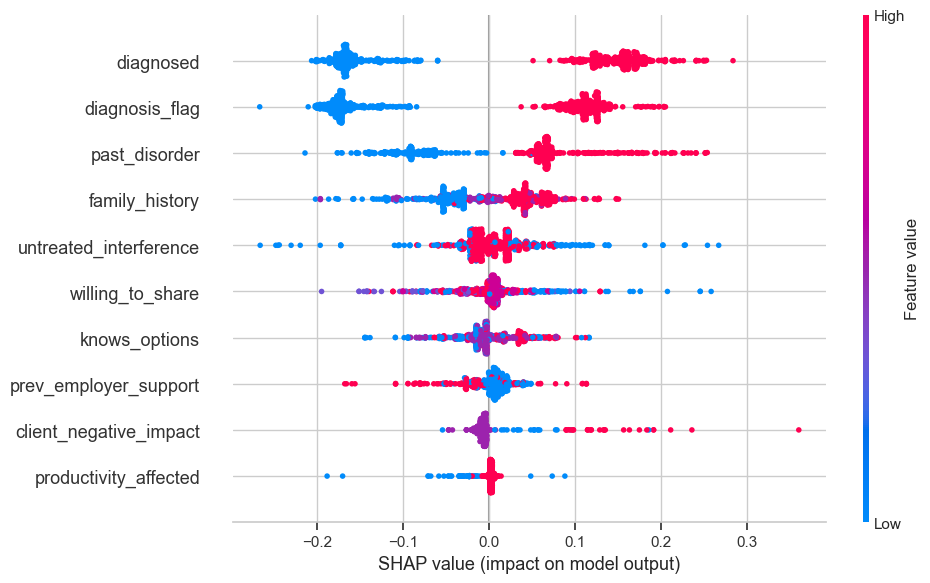

SHAP plots saved.

✅ Modeling completed successfully.
Saved: c:\Users\barba\mental-health-ey\data\processed\model_condition_with_probs.csv
Models and thresholds serialized successfully.


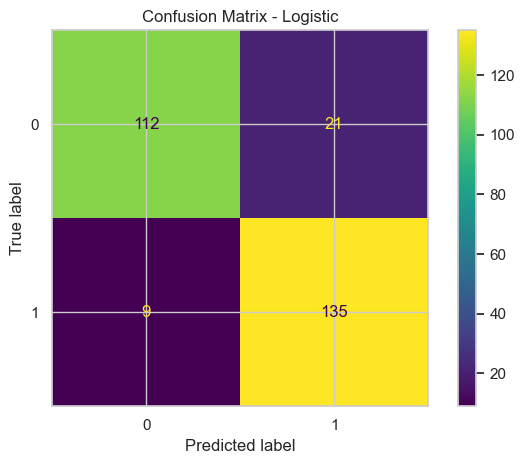

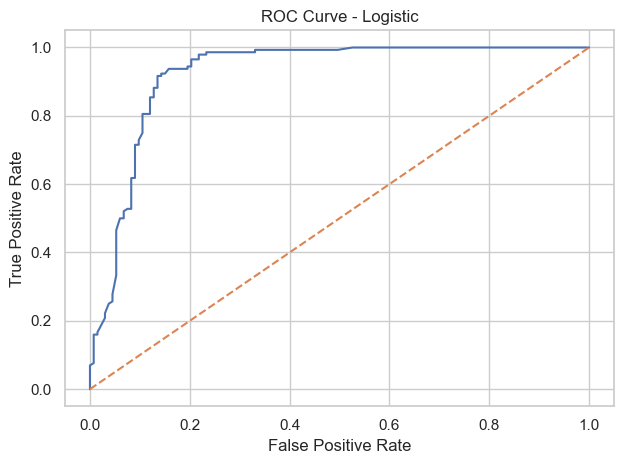

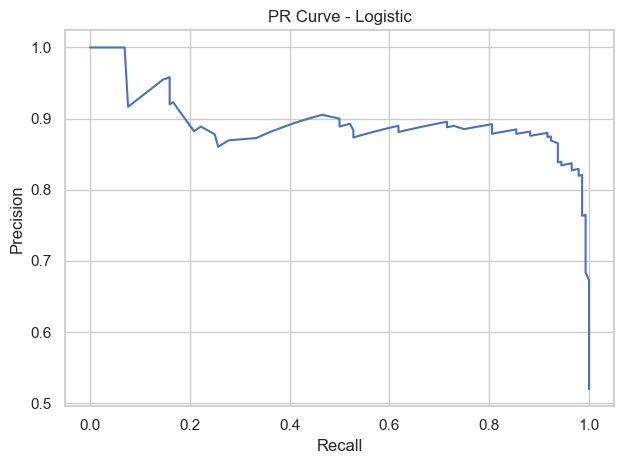

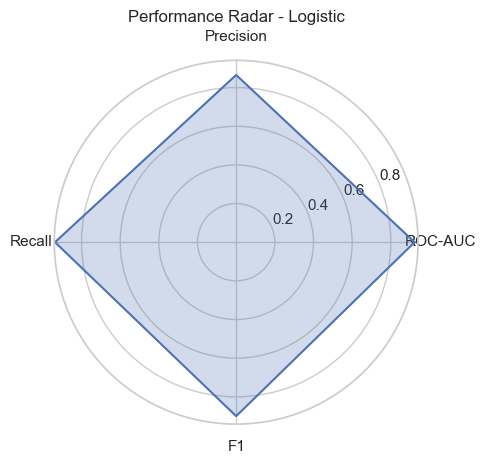

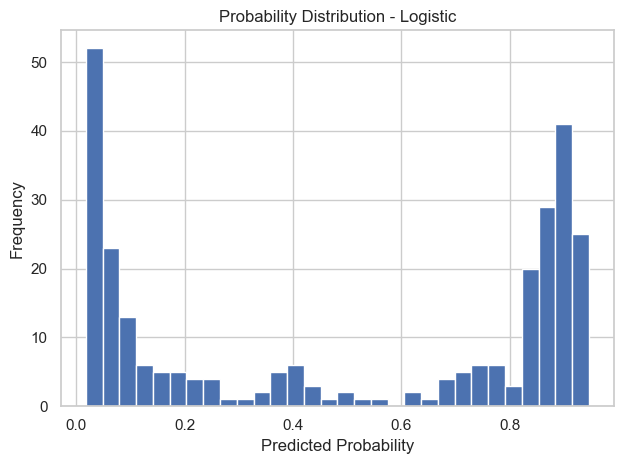

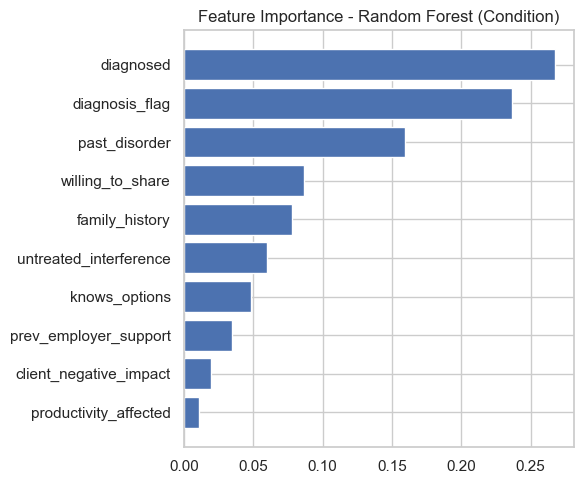


 Model Outputs 
Prediction file generated:
 - c:\Users\barba\mental-health-ey\data/processed/model_condition_with_probs.csv


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,knows_options,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,medical_leave_difficulty,...,Do you work remotely?,target_current_condition,target_seek_treatment,diagnosis_flag,mental_health_support_index,willing_to_share_inverted,workplace_stigma_index,organizational_openness_score,predicted_prob_condition_log,predicted_prob_condition_rf
0,0,3.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,5.0,...,3,0,0.0,1,0.2,-2.0,-0.666667,1.75,0.746633,0.536081
1,0,2.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,4.0,...,1,1,1.0,1,0.8,-2.0,-0.666667,2.00,0.910816,0.843482
2,0,2.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,3.0,...,5,0,1.0,0,0.2,-2.0,-0.500000,1.75,0.180440,0.018434
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,1.0,1,0.5,-1.0,-0.250000,1.25,0.759507,0.845021
4,0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,...,3,1,1.0,1,0.4,-2.0,-0.333333,2.00,0.910816,0.843482



Models stored in: c:\Users\barba\mental-health-ey\models
Images generated in: c:\Users\barba\mental-health-ey\images\condition
Files: ['CM_logistic.png', 'CM_logistic_condition.png', 'Probability_logistic.png', 'Probability_logistic_condition.png', 'PR_logistic.png', 'PR_logistic_condition.png', 'Radar_logistic.png', 'Radar_logistic_condition.png', 'RF_feature_importance.png', 'RF_feature_importance_condition.png', 'ROC_logistic.png', 'ROC_logistic_condition.png', 'SHAP_summary_condition.png']


In [9]:
# 7. Modeling - Condition

print("\n Running Condition Model \n")

%run ../src/model_condition.py

print("\n Model Outputs ")

if os.path.exists(os.path.join(BASE_DIR, "data/processed/model_condition_with_probs.csv")):
    df_condition = pd.read_csv(
        os.path.join(BASE_DIR, "data/processed/model_condition_with_probs.csv")
    )
    print("Prediction file generated:")
    print(" -", os.path.join(BASE_DIR, "data/processed/model_condition_with_probs.csv"))
    display(df_condition.head())
else:
    print("Prediction file not found.")

# Model directory
condition_model_dir = os.path.join(BASE_DIR, "models")
print("\nModels stored in:", condition_model_dir)

# Image outputs
condition_image_dir = os.path.join(BASE_DIR, "images", "condition")
if os.path.exists(condition_image_dir):
    print("Images generated in:", condition_image_dir)
    print("Files:", os.listdir(condition_image_dir))


### 🤖 Predictive Modeling - Current Condition

Logistic Regression achieved excellent discrimination power (ROC-AUC > 0.91), outperforming Random Forest.

The strong performance indicates that mental health condition is largely driven by structured and linear predictors rather than complex nonlinear interactions.

Key drivers include:
- Past disorder history
- Professional diagnosis
- Family history
- Productivity interference

The model demonstrates high predictive reliability and strong interpretability.



 Running Treatment Model 


LOGISTIC REGRESSION - TREATMENT

Confusion Matrix - Logistic Regression
[[125  24]
 [ 29 181]]
Best threshold: 0.313
CV ROC-AUC: 0.923
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       149
           1       0.88      0.86      0.87       210

    accuracy                           0.85       359
   macro avg       0.85      0.85      0.85       359
weighted avg       0.85      0.85      0.85       359

ROC AUC: 0.922

Logistic Regression Coefficients:
                    feature  coefficient
1                 diagnosed     0.896316
2            diagnosis_flag     0.738309
0             past_disorder     0.609875
9          willing_to_share     0.316761
8  medical_leave_difficulty    -0.305673
4            family_history     0.272839
7     prev_employer_support    -0.126005
6             knows_options     0.100003
3     productivity_affected     0.099276
5    untreated_interference     0.020435

Permuta

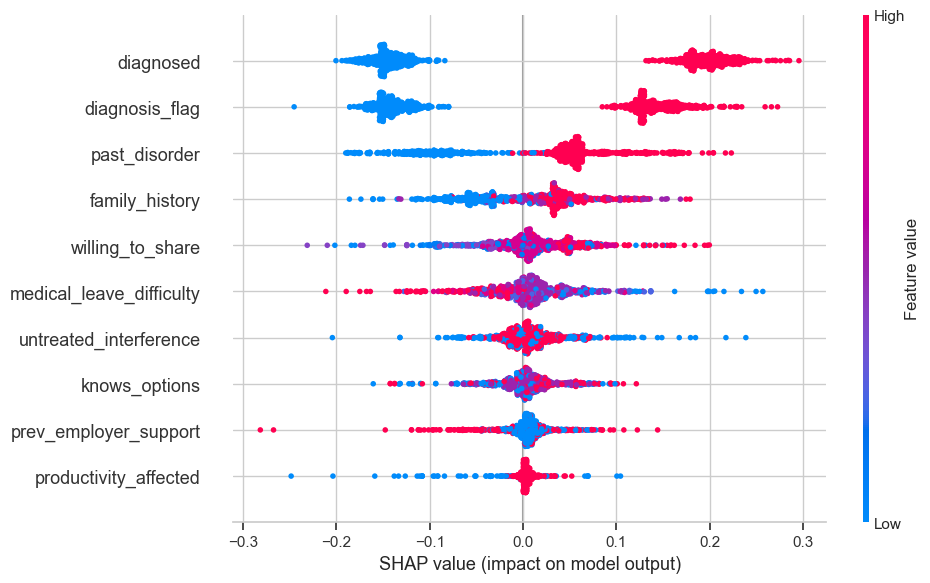

SHAP plots saved.

✅ Modeling completed successfully.
Saved: c:\Users\barba\mental-health-ey\data\processed\model_treatment_with_probs.csv
Models and thresholds serialized successfully.


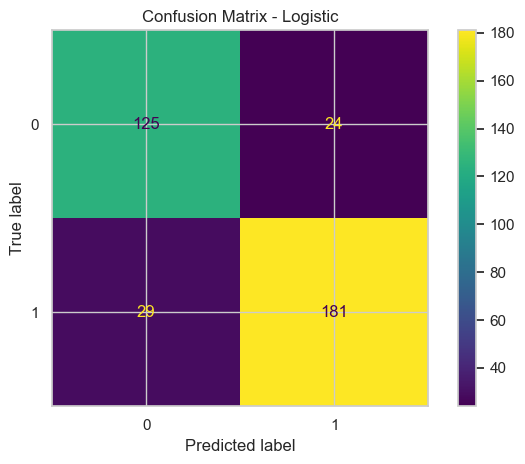

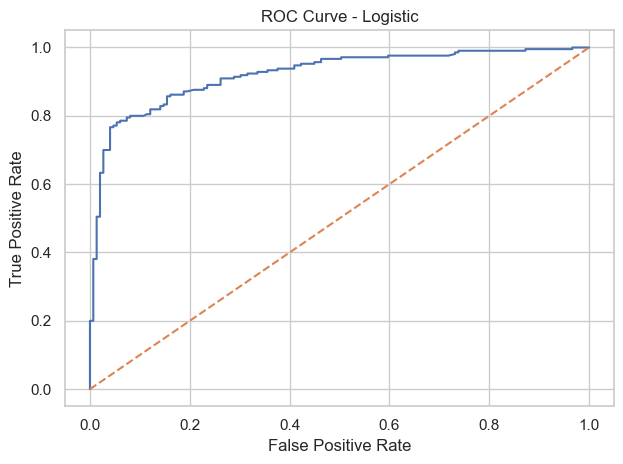

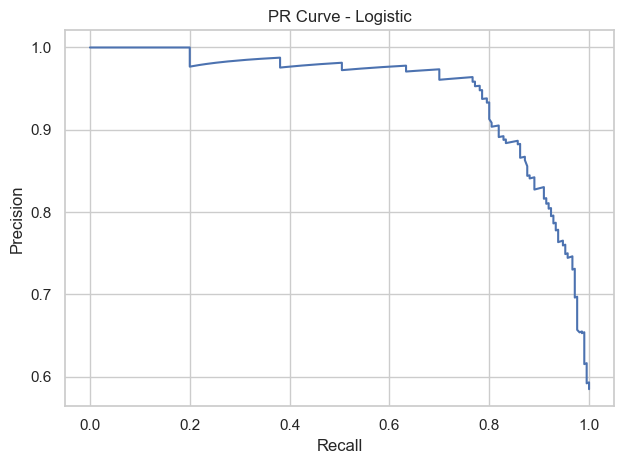

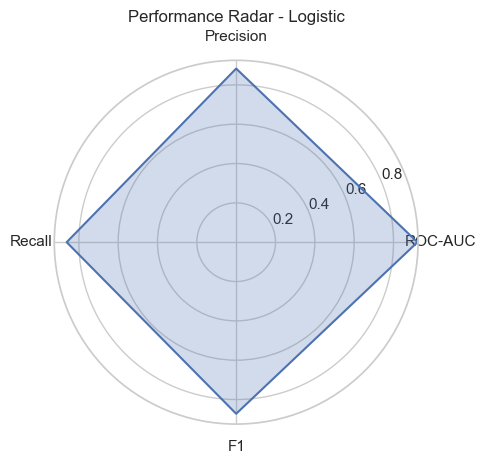

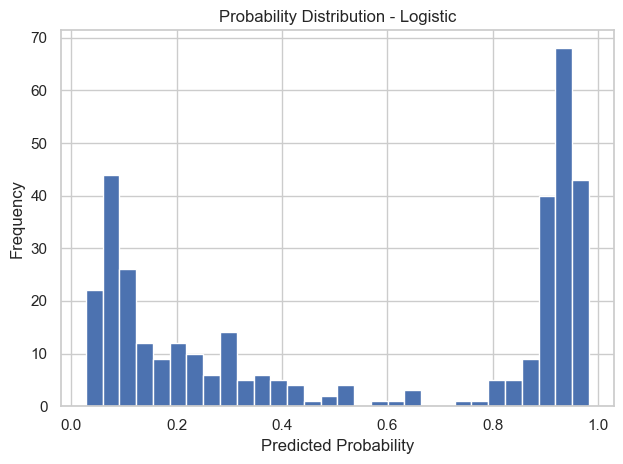

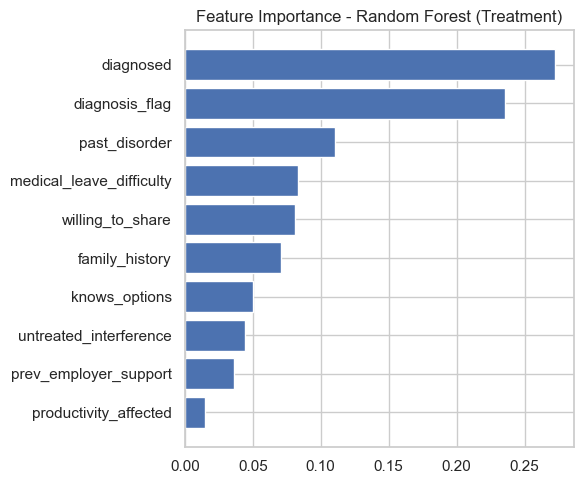


 Model Outputs 
Prediction file generated:
 - c:\Users\barba\mental-health-ey\data/processed/model_treatment_with_probs.csv


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,knows_options,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,medical_leave_difficulty,...,Do you work remotely?,target_current_condition,target_seek_treatment,diagnosis_flag,mental_health_support_index,willing_to_share_inverted,workplace_stigma_index,organizational_openness_score,predicted_prob_treatment_log,predicted_prob_treatment_rf
0,0,3.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,5.0,...,3,0.0,0,1,0.2,-2.0,-0.666667,1.75,0.830649,0.344000
1,0,2.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,4.0,...,1,1.0,1,1,0.8,-2.0,-0.666667,2.00,0.944692,0.991800
2,0,2.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,3.0,...,5,0.0,1,0,0.2,-2.0,-0.500000,1.75,0.245259,0.681478
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1.0,1,1,0.5,-1.0,-0.250000,1.25,0.860769,0.918000
4,0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,...,3,1.0,1,1,0.4,-2.0,-0.333333,2.00,0.957525,0.766842



 Models stored in: c:\Users\barba\mental-health-ey\models
Images generated in: c:\Users\barba\mental-health-ey\images\treatment
Files: ['CM_logistic-treatment.png', 'CM_logistic.png', 'Probability_logistic-treatment.png', 'Probability_logistic.png', 'PR_logistic-treatment.png', 'PR_logistic.png', 'Radar_logistic-treatment.png', 'Radar_logistic.png', 'RF_feature_importance-treatment.png', 'RF_feature_importance.png', 'ROC_logistic-treatment.png', 'ROC_logistic.png', 'SHAP_summary_treatment.png']


In [10]:
# 8. Modeling - Treatment

print("\n Running Treatment Model \n")

%run ../src/model_treatment.py

print("\n Model Outputs ")

if os.path.exists(os.path.join(BASE_DIR, "data/processed/model_treatment_with_probs.csv")):
    df_treatment = pd.read_csv(
        os.path.join(BASE_DIR, "data/processed/model_treatment_with_probs.csv")
    )
    print("Prediction file generated:")
    print(" -", os.path.join(BASE_DIR, "data/processed/model_treatment_with_probs.csv"))
    display(df_treatment.head())
else:
    print("Prediction file not found.")

# Model directory
treatment_model_dir = os.path.join(BASE_DIR, "models")
print("\n Models stored in:", treatment_model_dir)

# Image outputs
treatment_image_dir = os.path.join(BASE_DIR, "images", "treatment")
if os.path.exists(treatment_image_dir):
    print("Images generated in:", treatment_image_dir)
    print("Files:", os.listdir(treatment_image_dir))


### 💬 Predictive Modeling - Treatment Seeking

The treatment model achieved ROC-AUC ≈ 0.92 with balanced precision and recall.

Unlike the condition model, treatment behavior is influenced not only by diagnosis but also by organizational factors such as:

- Knowledge of available support
- Workplace openness
- Perceived stigma

This highlights that seeking treatment is partially driven by workplace culture and support visibility.



 Running Clustering 

Loaded dataset shape: (1433, 69)

Features used for clustering:
['past_disorder', 'diagnosed', 'diagnosis_flag', 'productivity_affected', 'family_history', 'knows_options', 'prev_employer_support', 'untreated_interference', 'client_negative_impact', 'willing_to_share']


c:\Users\barba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\barba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\barba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\barba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window


Optimal number of clusters (silhouette): 3


c:\Users\barba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Cluster sizes:
0    707
1    652
2     74
Name: cluster, dtype: int64


c:\Users\barba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Model Comparison:
KMeans Silhouette Score:        0.2904
Agglomerative Silhouette Score: 0.2836

Selected model: KMeans

Cluster means:
         past_disorder  diagnosed  diagnosis_flag  productivity_affected  \
cluster                                                                    
0                0.965      1.000           0.993                  0.968   
1                0.205      0.000           0.000                  1.000   
2                0.172      0.122           0.122                  0.196   

         family_history  knows_options  prev_employer_support  \
cluster                                                         
0                 0.743          0.588                  0.190   
1                 0.397          0.364                  0.295   
2                 0.318            NaN                  0.380   

         untreated_interference  client_negative_impact  willing_to_share  
cluster                                                                    
0   

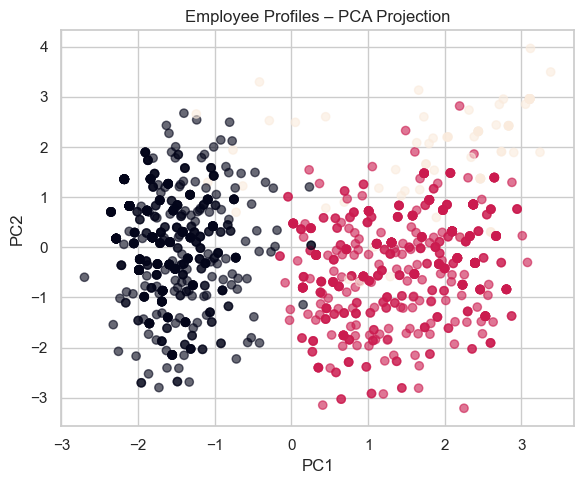


✅ Clustering completed successfully.
Optimal K: 3
Metrics saved to: c:\Users\barba\mental-health-ey\data\analysis\cluster_metrics.txt


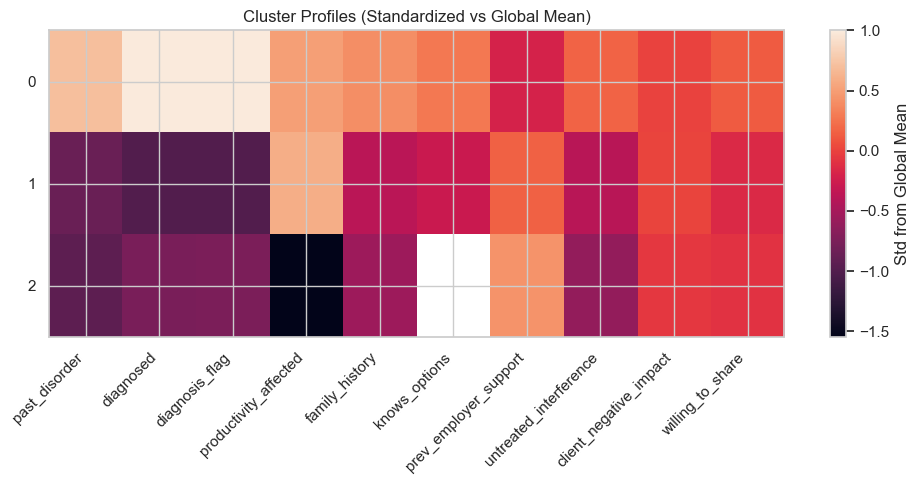

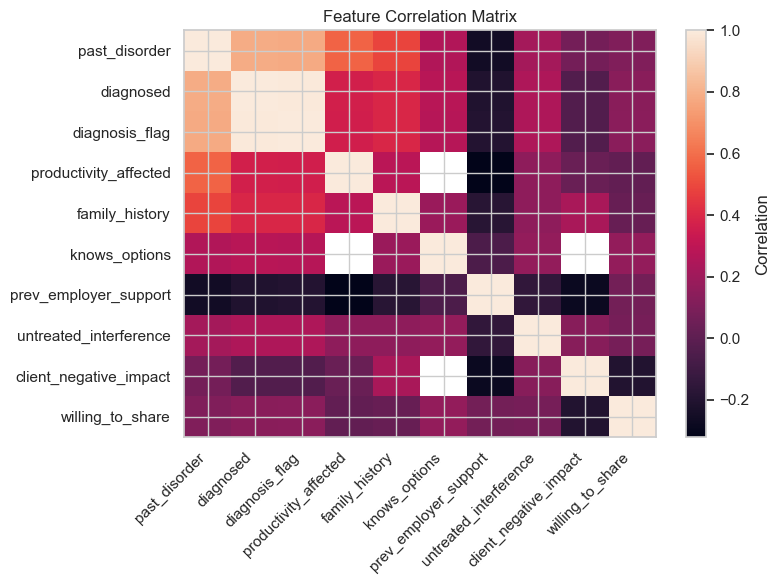

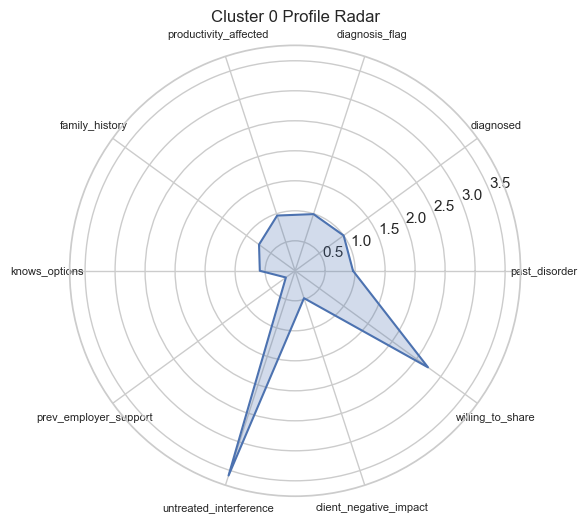

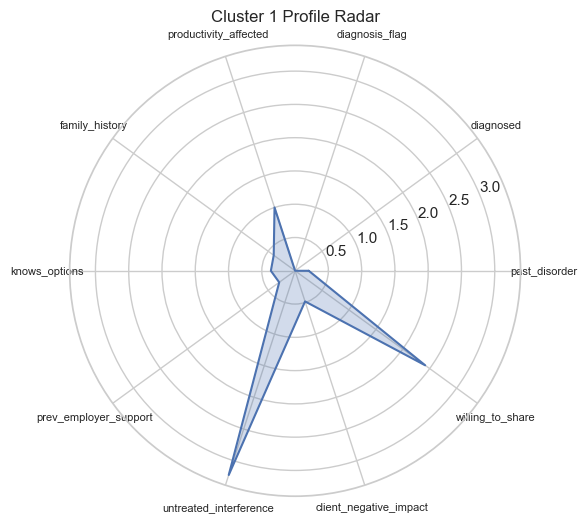

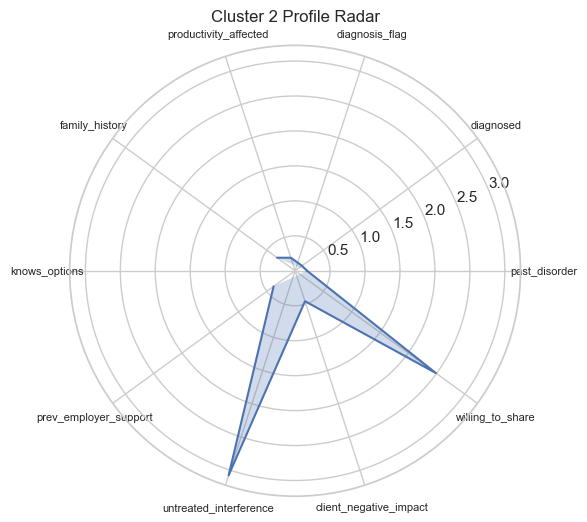

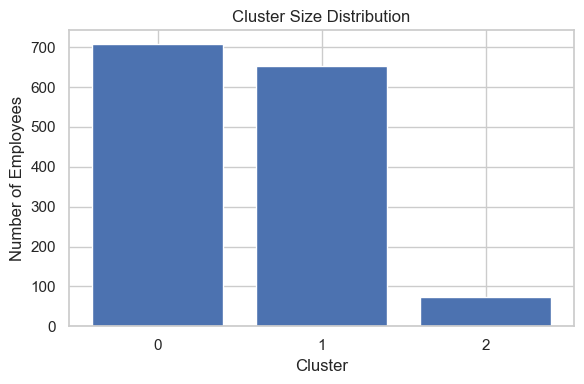


Clustering outputs:
 - Clusters file: c:\Users\barba\mental-health-ey\data\analysis\clusters.csv


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,knows_options,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,Which of the following best describes your work position?,Do you work remotely?,target_current_condition,target_seek_treatment,diagnosis_flag,mental_health_support_index,willing_to_share_inverted,workplace_stigma_index,organizational_openness_score,cluster
0,0,3.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,5.0,...,back-end developer,3,0.0,0.0,1,0.2,-2.0,-0.666667,1.75,0
1,0,2.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,4.0,...,back-end developer|front-end developer,1,1.0,1.0,1,0.8,-2.0,-0.666667,2.00,0
2,0,2.0,1.0,NaN,0.0,NaN,0.0,0.0,0.5,3.0,...,back-end developer,5,0.0,1.0,0,0.2,-2.0,-0.500000,1.75,1
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,supervisor/team lead,3,1.0,1.0,1,0.5,-1.0,-0.250000,1.25,0
4,0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,...,executive leadership|supervisor/team lead|dev ...,3,1.0,1.0,1,0.4,-2.0,-0.333333,2.00,0


 - Cluster summary: c:\Users\barba\mental-health-ey\data\analysis\cluster_summary.csv


,cluster,past_disorder,diagnosed,diagnosis_flag,productivity_affected,family_history,knows_options,prev_employer_support,untreated_interference,client_negative_impact,willing_to_share
0,0,0.965,1.000,0.993,0.968,0.743,0.588,0.190,3.587,0.480,2.738
1,1,0.205,0.000,0.000,1.000,0.397,0.364,0.295,3.226,0.484,2.416
2,2,0.172,0.122,0.122,0.196,0.318,NaN,0.380,3.077,0.458,2.490


 - Cluster metrics: c:\Users\barba\mental-health-ey\data\analysis\cluster_metrics.txt

Cluster Metrics:

Clustering Metrics

K=2 | Silhouette=0.2762 | Inertia=10579.43
K=3 | Silhouette=0.2904 | Inertia=9402.73
K=4 | Silhouette=0.2533 | Inertia=8501.35
K=5 | Silhouette=0.1987 | Inertia=7931.85
K=6 | Silhouette=0.2564 | Inertia=7377.08
K=7 | Silhouette=0.2129 | Inertia=6867.51
K=8 | Silhouette=0.2321 | Inertia=6355.15

Best K based on silhouette: 3

Model Comparison
KMeans Silhouette: 0.2904
Agglomerative Silhouette: 0.2836
Selected Model: KMeans



In [11]:
# 9. Clustering

print("\n Running Clustering \n")

%run ../src/clustering.py

print("\nClustering outputs:")

if os.path.exists(CLUSTER_OUTPUT_PATH):
    print(" - Clusters file:", CLUSTER_OUTPUT_PATH)
    display(pd.read_csv(CLUSTER_OUTPUT_PATH).head())
else:
    print("⚠️ clusters.csv not found")

if os.path.exists(SUMMARY_OUTPUT_PATH):
    print(" - Cluster summary:", SUMMARY_OUTPUT_PATH)
    display(pd.read_csv(SUMMARY_OUTPUT_PATH))
else:
    print("⚠️ cluster_summary.csv not found")

if os.path.exists(METRICS_OUTPUT_PATH):
    print(" - Cluster metrics:", METRICS_OUTPUT_PATH)
    with open(METRICS_OUTPUT_PATH, "r") as f:
        print("\nCluster Metrics:\n")
        print(f.read())
else:
    print("⚠️ cluster_metrics.txt not found")



### 👥 Employee Segmentation – Behavioral Risk Profiles

KMeans clustering (k=3) was selected based on silhouette comparison and interpretability of standardized behavioral and clinical features.

The clustering structure reveals three distinct profiles:

1️. **Clinically Diagnosed & High Interference**
   - Near-universal past disorder and diagnosis
   - Very high productivity impact
   - Highest untreated work interference
   - Moderate awareness of support options but low perceived employer support

2️. **Undiagnosed but Operationally Impacted**
   - No formal diagnosis
   - Universal productivity impact
   - High untreated interference
   - Lower awareness of available support resources

3️. **Lower Clinical Risk & Moderate Support**
   - Low diagnosis and past disorder prevalence
   - Low productivity impact
   - Lower interference scores
   - Higher perceived employer support compared to other clusters

This segmentation indicates that mental health impact is structurally heterogeneous across the workforce. Importantly, the presence of a fully productivity-affected yet undiagnosed cluster highlights potential gaps in early detection and access to care.



In [12]:
# 10. Generate Submission Excel

print("\n Generating Submission Excel \n")

%run ../src/submission_excel.py

print("\n Submission outputs:")

if os.path.exists(SUBMISSION_OUTPUT):
    print(" - Submission Excel:", SUBMISSION_OUTPUT)
else:
    print("⚠️ Submission Excel not found")




 Generating Submission Excel 

✅ Submission Excel successfully generated:
  c:\Users\barba\mental-health-ey\data/processed/submission_filled.xlsx

 Submission outputs:
 - Submission Excel: c:\Users\barba\mental-health-ey\data/processed/submission_filled.xlsx


In [13]:
# 11. Summary & Outputs

print("\n" + "="*60)
print("PIPELINE COMPLETED SUCCESSFULLY")
print("="*60)

outputs = [
    ("Cleaned Data", CLEAN_PATH),
    ("Feature Data", FEATURE_PATH),
    ("Model Condition Probabilities", os.path.join(BASE_DIR, "data/processed/model_condition_with_probs.csv")),
    ("Model Treatment Probabilities", os.path.join(BASE_DIR, "data/processed/model_treatment_with_probs.csv")),
    ("Clusters CSV", os.path.join(BASE_DIR, "data/analysis/clusters.csv")),
    ("Cluster Summary", os.path.join(BASE_DIR, "data/analysis/cluster_summary.csv")),
    ("Submission Excel", os.path.join(BASE_DIR, "data/processed/submission_filled.xlsx")),
    ("Logistic Condition Threshold", os.path.join(BASE_DIR, "models/logistic_threshold_condition.pkl")),
    ("RF Condition Threshold", os.path.join(BASE_DIR, "models/rf_threshold_condition.pkl")),
    ("Logistic Treatment Threshold", os.path.join(BASE_DIR, "models/logistic_threshold_treatment.pkl")),
    ("RF Treatment Threshold", os.path.join(BASE_DIR, "models/rf_threshold_treatment.pkl")),

]

for name, path in outputs:
    print(f"{name:<35} → {path}")



PIPELINE COMPLETED SUCCESSFULLY
Cleaned Data                        → c:\Users\barba\mental-health-ey\data/processed/mental_health_cleaned.csv
Feature Data                        → c:\Users\barba\mental-health-ey\data\processed\mental_health_features.csv
Model Condition Probabilities       → c:\Users\barba\mental-health-ey\data/processed/model_condition_with_probs.csv
Model Treatment Probabilities       → c:\Users\barba\mental-health-ey\data/processed/model_treatment_with_probs.csv
Clusters CSV                        → c:\Users\barba\mental-health-ey\data/analysis/clusters.csv
Cluster Summary                     → c:\Users\barba\mental-health-ey\data/analysis/cluster_summary.csv
Submission Excel                    → c:\Users\barba\mental-health-ey\data/processed/submission_filled.xlsx
Logistic Condition Threshold        → c:\Users\barba\mental-health-ey\models/logistic_threshold_condition.pkl
RF Condition Threshold              → c:\Users\barba\mental-health-ey\models/rf_threshold_con

### ✅ Pipeline Completion

The workflow integrates:

- Structured data cleaning
- Feature engineering with composite indexes
- Predictive modeling with interpretability
- Behavioral segmentation
- Reproducible submission outputs

The resulting framework provides both predictive accuracy and actionable organizational insights.
